**PA 4: Decision Trees**

Polycystic ovary syndrome (PCOS) dataset

Link: https://www.kaggle.com/datasets/prasoonkottarathil/polycystic-ovary-syndrome-pcos

In [ ]:
import pandas as pd
from google.colab import drive
#Importing all the libraries that I use in this project
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# importing data
file_path_with_infertility="/content/drive/MyDrive/project assignments/datasets/PCOS_infertility.csv"
file_path_without_infertility="/content/drive/MyDrive/project assignments/datasets/PCOS_data_without_infertility.xlsx"

PCOS_inf = pd.read_csv(file_path_with_infertility)
PCOS_woinf = pd.read_excel(file_path_without_infertility, sheet_name="Full_new")

In [ ]:
PCOS_inf.head()

,Sl. No,Patient File No.,PCOS (Y/N),I beta-HCG(mIU/mL),II beta-HCG(mIU/mL),AMH(ng/mL)
0,1,10001,0,1.99,1.99,2.07
1,2,10002,0,60.80,1.99,1.53
2,3,10003,1,494.08,494.08,6.63
3,4,10004,0,1.99,1.99,1.22
4,5,10005,0,801.45,801.45,2.26


In [ ]:
PCOS_woinf.head()

,Sl. No,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),...,Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm),Unnamed: 44
0,1,1,0,28,44.6,152.0,19.300000,15,78,22,...,1.0,0,110,80,3,3,18.0,18.0,8.5,NaN
1,2,2,0,36,65.0,161.5,24.921163,15,74,20,...,0.0,0,120,70,3,5,15.0,14.0,3.7,NaN
2,3,3,1,33,68.8,165.0,25.270891,11,72,18,...,1.0,0,120,80,13,15,18.0,20.0,10.0,NaN
3,4,4,0,37,65.0,148.0,29.674945,13,72,20,...,0.0,0,120,70,2,2,15.0,14.0,7.5,NaN
4,5,5,0,25,52.0,161.0,20.060954,11,72,18,...,0.0,0,120,80,3,4,16.0,14.0,7.0,NaN


In [ ]:
#Merging the two files as per patient file no. 
#The files were sorted into two based on patients with infertility and without infertility
data = pd.merge(PCOS_woinf,PCOS_inf, on='Patient File No.', suffixes={'','_y'},how='left')

#Dropping the repeated features after merging
data =data.drop(['Unnamed: 44', 'Sl. No_y', 'PCOS (Y/N)_y', '  I   beta-HCG(mIU/mL)_y',
       'II    beta-HCG(mIU/mL)_y', 'AMH(ng/mL)_y'], axis=1)

#Taking a look at the dataset
data.tail() 

In [ ]:
data.shape

(541, 44)

In [ ]:
# Identifying the data types
data.dtypes

Sl. No                      int64
Patient File No.            int64
PCOS (Y/N)                  int64
 Age (yrs)                  int64
Weight (Kg)               float64
Height(Cm)                float64
BMI                       float64
Blood Group                 int64
Pulse rate(bpm)             int64
RR (breaths/min)            int64
Hb(g/dl)                  float64
Cycle(R/I)                  int64
Cycle length(days)          int64
Marraige Status (Yrs)     float64
Pregnant(Y/N)               int64
No. of aborptions           int64
  I   beta-HCG(mIU/mL)    float64
II    beta-HCG(mIU/mL)     object
FSH(mIU/mL)               float64
LH(mIU/mL)                float64
FSH/LH                    float64
Hip(inch)                   int64
Waist(inch)                 int64
Waist:Hip Ratio           float64
TSH (mIU/L)               float64
AMH(ng/mL)                 object
PRL(ng/mL)                float64
Vit D3 (ng/mL)            float64
PRG(ng/mL)                float64
RBS(mg/dl)    

Two columns are numeric but they are stored as string that we need to convert them to numeric values:

II    beta-HCG(mIU/mL)

AMH(ng/mL)

In [ ]:
# Identifying the missing values
data.isnull().sum()

Sl. No                    0
Patient File No.          0
PCOS (Y/N)                0
 Age (yrs)                0
Weight (Kg)               0
Height(Cm)                0
BMI                       0
Blood Group               0
Pulse rate(bpm)           0
RR (breaths/min)          0
Hb(g/dl)                  0
Cycle(R/I)                0
Cycle length(days)        0
Marraige Status (Yrs)     1
Pregnant(Y/N)             0
No. of aborptions         0
  I   beta-HCG(mIU/mL)    0
II    beta-HCG(mIU/mL)    0
FSH(mIU/mL)               0
LH(mIU/mL)                0
FSH/LH                    0
Hip(inch)                 0
Waist(inch)               0
Waist:Hip Ratio           0
TSH (mIU/L)               0
AMH(ng/mL)                0
PRL(ng/mL)                0
Vit D3 (ng/mL)            0
PRG(ng/mL)                0
RBS(mg/dl)                0
Weight gain(Y/N)          0
hair growth(Y/N)          0
Skin darkening (Y/N)      0
Hair loss(Y/N)            0
Pimples(Y/N)              0
Fast food (Y/N)     

In [ ]:
# printing rows with missing values
data[data.isna().any(axis=1)]

,Sl. No,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),...,Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
156,157,157,0,27,53.2,158.0,21.3,13,72,22,...,0,NaN,1,120,70,5,7,11.0,13.0,11.0
458,459,459,1,36,66.0,162.0,25.1,15,72,20,...,0,0.0,0,120,80,14,5,19.0,19.0,8.0


In [ ]:
# Dropping rows with NaN value
data = data.dropna()

# Clearing up the extra space in the column names (optional)
data.columns = [col.strip() for col in data.columns]

# Dropping the irrelevent columns
irrelevent=data.iloc[:,0:2]
data=data.drop(irrelevent,axis=1)
data

,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),Hb(g/dl),Cycle(R/I),...,Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
0,0,28,44.6,152.000,19.300000,15,78,22,10.48,2,...,0,1.0,0,110,80,3,3,18.0,18.0,8.5
1,0,36,65.0,161.500,24.921163,15,74,20,11.70,2,...,0,0.0,0,120,70,3,5,15.0,14.0,3.7
2,1,33,68.8,165.000,25.270891,11,72,18,11.80,2,...,1,1.0,0,120,80,13,15,18.0,20.0,10.0
3,0,37,65.0,148.000,29.674945,13,72,20,12.00,2,...,0,0.0,0,120,70,2,2,15.0,14.0,7.5
4,0,25,52.0,161.000,20.060954,11,72,18,10.00,2,...,0,0.0,0,120,80,3,4,16.0,14.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
536,0,35,50.0,164.592,18.500000,17,72,16,11.00,2,...,0,0.0,0,110,70,1,0,17.5,10.0,6.7
537,0,30,63.2,158.000,25.300000,15,72,18,10.80,2,...,0,0.0,0,110,70,9,7,19.0,18.0,8.2
538,0,36,54.0,152.000,23.400000,13,74,20,10.80,2,...,0,0.0,0,110,80,1,0,18.0,9.0,7.3
539,0,27,50.0,150.000,22.200000,15,74,20,12.00,4,...,1,0.0,0,110,70,7,6,18.0,16.0,11.5


The columns with missing values (each contain one missing value):

Marraige Status (Yrs)     1

Fast food (Y/N)           1


In [ ]:
# Converting strings to numeric values
data["AMH(ng/mL)"] = pd.to_numeric(data["AMH(ng/mL)"], errors='coerce')
data["II    beta-HCG(mIU/mL)"] = pd.to_numeric(data["II    beta-HCG(mIU/mL)"], errors='coerce')
# Checking the result
data.dtypes

PCOS (Y/N)                  int64
Age (yrs)                   int64
Weight (Kg)               float64
Height(Cm)                float64
BMI                       float64
Blood Group                 int64
Pulse rate(bpm)             int64
RR (breaths/min)            int64
Hb(g/dl)                  float64
Cycle(R/I)                  int64
Cycle length(days)          int64
Marraige Status (Yrs)     float64
Pregnant(Y/N)               int64
No. of aborptions           int64
I   beta-HCG(mIU/mL)      float64
II    beta-HCG(mIU/mL)    float64
FSH(mIU/mL)               float64
LH(mIU/mL)                float64
FSH/LH                    float64
Hip(inch)                   int64
Waist(inch)                 int64
Waist:Hip Ratio           float64
TSH (mIU/L)               float64
AMH(ng/mL)                float64
PRL(ng/mL)                float64
Vit D3 (ng/mL)            float64
PRG(ng/mL)                float64
RBS(mg/dl)                float64
Weight gain(Y/N)            int64
hair growth(Y/

# **Data Analysis & Feature Engineering**

In [ ]:
# Calegorical features
columns = data.columns

categorical_columns_dict = {}
categorical_columns = []
for column in columns:
  if len(data[column].unique()) < 9:
    categorical_columns_dict[column] = len(data[column].unique())
    categorical_columns.append(column)

#print(columns)
for key, value in categorical_columns_dict.items():
  print(key, ": ", value)

PCOS (Y/N) :  2
Blood Group :  8
RR (breaths/min) :  8
Cycle(R/I) :  3
Pregnant(Y/N) :  2
No. of aborptions :  6
Weight gain(Y/N) :  2
hair growth(Y/N) :  2
Skin darkening (Y/N) :  2
Hair loss(Y/N) :  2
Pimples(Y/N) :  2
Fast food (Y/N) :  2
Reg.Exercise(Y/N) :  2
BP _Systolic (mmHg) :  6
BP _Diastolic (mmHg) :  5


From the table above and analyzing the data we can colclude the following columns are categorical:

Blood Group

Cycle(R/I)

Pregnant(Y/N)

Weight gain(Y/N)

hair growth(Y/N)

Skin darkening (Y/N)

Hair loss(Y/N) 

Pimples(Y/N)

Fast food (Y/N)

Reg.Exercise(Y/N)

In [ ]:
# Removing the incorrect ones from the categorical columns
categorical_columns.remove('RR (breaths/min)')
categorical_columns.remove('No. of aborptions')
categorical_columns.remove('BP _Systolic (mmHg)')
categorical_columns.remove('BP _Diastolic (mmHg)')
categorical_columns.remove('PCOS (Y/N)')

In [ ]:
# The rest are numerical columns
numeric_columns = list(set(columns) - set(categorical_columns))
numeric_columns

['II    beta-HCG(mIU/mL)',
 'LH(mIU/mL)',
 'Waist(inch)',
 'TSH (mIU/L)',
 'RR (breaths/min)',
 'PRL(ng/mL)',
 'BP _Diastolic (mmHg)',
 'I   beta-HCG(mIU/mL)',
 'Age (yrs)',
 'Avg. F size (R) (mm)',
 'Waist:Hip Ratio',
 'Cycle length(days)',
 'Follicle No. (R)',
 'PCOS (Y/N)',
 'Marraige Status (Yrs)',
 'Hip(inch)',
 'PRG(ng/mL)',
 'BP _Systolic (mmHg)',
 'AMH(ng/mL)',
 'Weight (Kg)',
 'BMI',
 'Endometrium (mm)',
 'Vit D3 (ng/mL)',
 'Pulse rate(bpm)',
 'FSH(mIU/mL)',
 'No. of aborptions',
 'Follicle No. (L)',
 'RBS(mg/dl)',
 'FSH/LH',
 'Avg. F size (L) (mm)',
 'Hb(g/dl)',
 'Height(Cm)']

The label of the model we are going to choose would be:

PCOS (Y/N)

We have deleted the row 157 and row 459 with missing values.

We have also deleted the first two columns that is irrelevent with the future ML model we are going to build.

After all these, we couldn't identify any more issues with the data. So we will proceed with the univariate and bivariate analysis.

**Univariate analysis & bivariate analysis**

In [ ]:
import matplotlib.pyplot as plt

for col in numeric_columns:
  plt.figure()
  plt.title(col)
  plt.hist(data[col],bins=20)

The following columns seem to have a Gaussian distribution:

Endometrium

Weight

Age

Mariage Status

PRL

Cycle Length

Waist

Hip

Waist:Hip ratio

Average F Size

RBS

BMI

Height

HB

In [ ]:
for col in numeric_columns:
  plt.figure()
  plt.title(col)
  plt.boxplot(data[col])

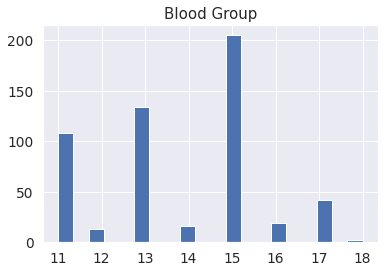

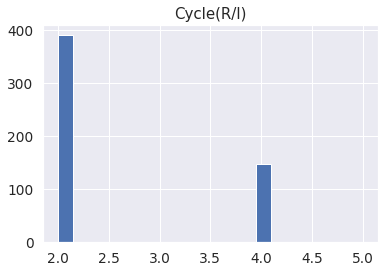

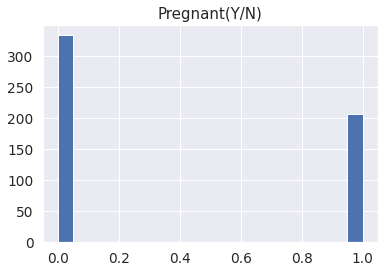

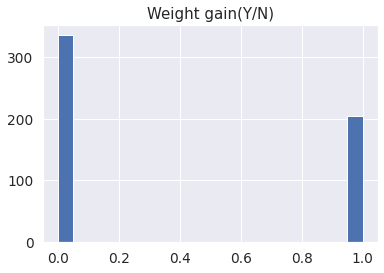

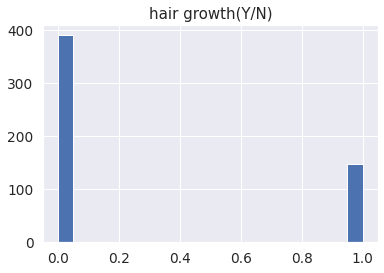

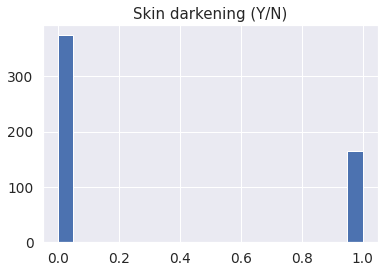

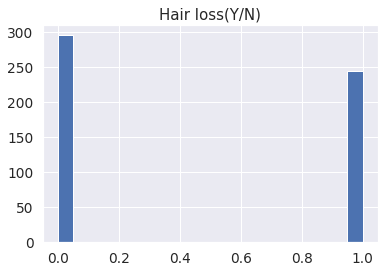

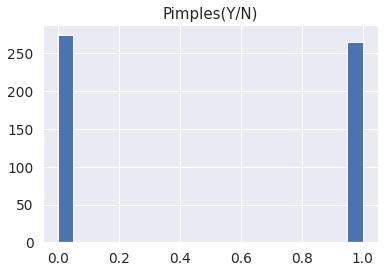

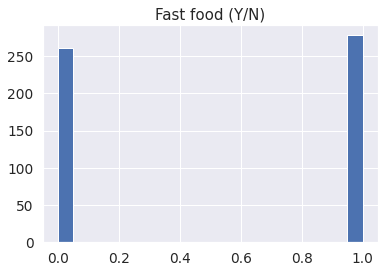

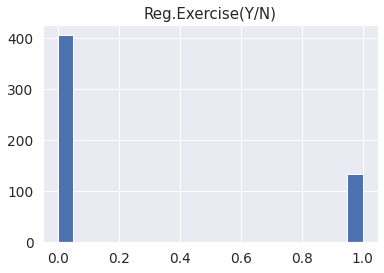

In [ ]:
for col in categorical_columns:
  plt.figure()
  plt.title(col)
  plt.hist(data[col],bins=20)

The following columns seem to have outliers:

PRG

FSH

LH

FSH/LH

AMH

PRL

Cycle(R/I)

I   beta-HCG

II    beta-HCG

Pulse rate

TSH

Vit D3
 
RBS

BP _Systolic

BP _Diastolic.

In "Cycle (R/I)": there is an outlier value of 5, possibly a typo during the data recording. Should we drop this sample?

In "Pulse rate": one count of 13, one count of 18. Are they typos?

"beta HCG", "PRL", "TSH", "FSH" "LH" "AMH" "PRL" "Vit D3" "PRG" and "RBS" columns have a lot of outliers which rises some concerns with respect to the correctness of lab measurements.

BP_systolic: a value of 12. Maybe a typo during the data recording. Should it be 120 instead?

BP_Diastolic: a value of 8. Maybe a typo during the data recording. Should it be 80 instead?


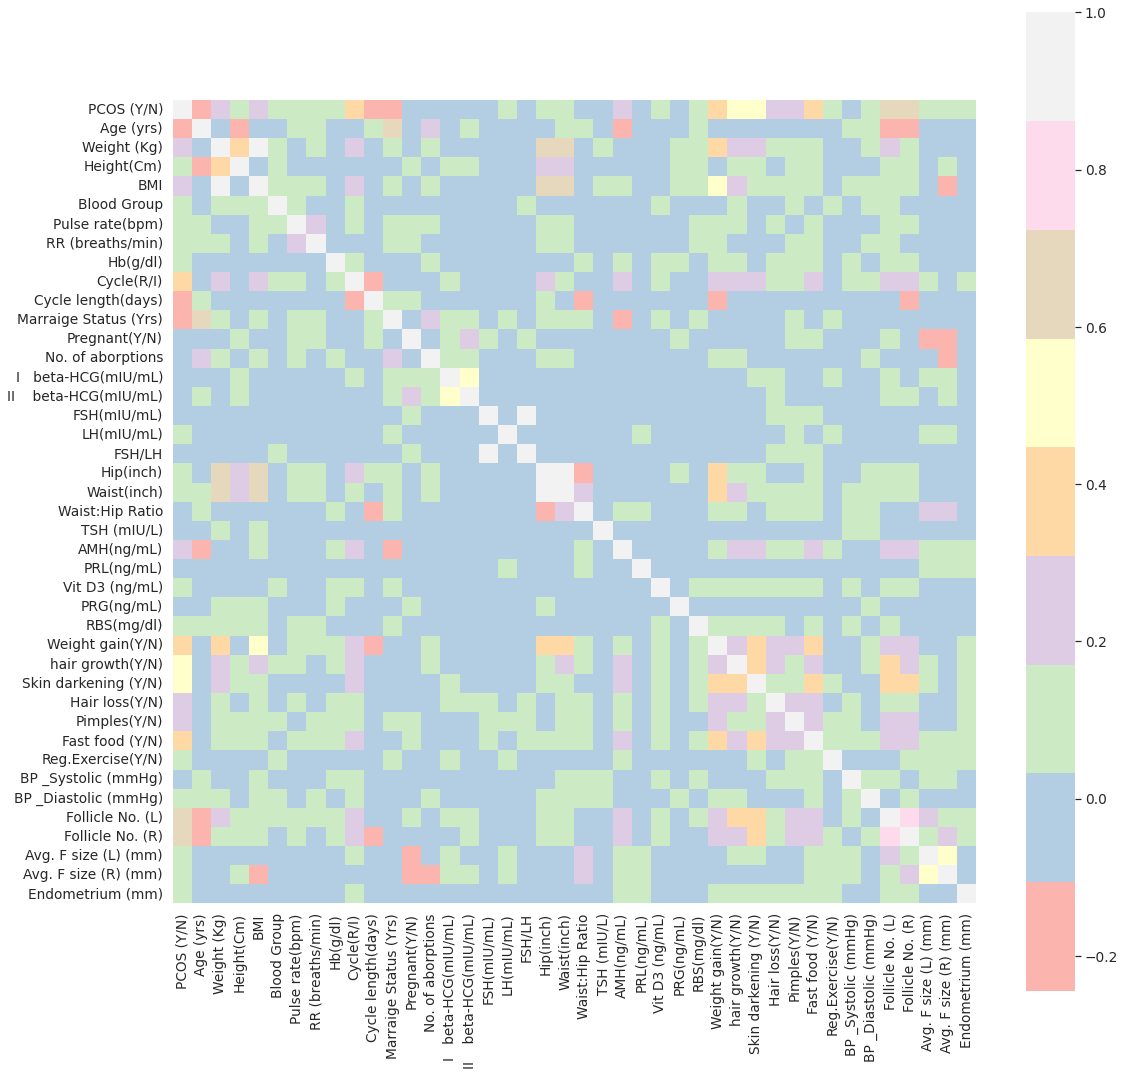

In [ ]:
import seaborn as sns

# Examaning a correlation matrix of all the features 
corrmat = data.corr()
plt.subplots(figsize=(18,18))
sns.heatmap(corrmat,cmap="Pastel1", square=True);

Features with binary values:

Pregnant(Y/N)

Weight gain(Y/N)

hair growth(Y/N)

Skin darkening (Y/N)

Hair loss(Y/N)

Pimples(Y/N)

Fast food (Y/N)

Reg.Exercise(Y/N)

In [ ]:
#How all the features correlate with the PCOS 

corrmat["PCOS (Y/N)"].sort_values(ascending=False)


PCOS (Y/N)                1.000000
Follicle No. (R)          0.651032
Follicle No. (L)          0.601445
Skin darkening (Y/N)      0.481768
hair growth(Y/N)          0.466930
Weight gain(Y/N)          0.443652
Cycle(R/I)                0.402312
Fast food (Y/N)           0.381772
Pimples(Y/N)              0.288609
AMH(ng/mL)                0.263974
Weight (Kg)               0.210280
BMI                       0.198638
Hair loss(Y/N)            0.177458
Waist(inch)               0.162143
Hip(inch)                 0.161700
Avg. F size (L) (mm)      0.129181
Endometrium (mm)          0.109132
Avg. F size (R) (mm)      0.094268
Pulse rate(bpm)           0.092437
Hb(g/dl)                  0.086934
Vit D3 (ng/mL)            0.085829
Reg.Exercise(Y/N)         0.069481
Height(Cm)                0.066361
LH(mIU/mL)                0.064136
RBS(mg/dl)                0.049420
RR (breaths/min)          0.038031
BP _Diastolic (mmHg)      0.035110
Blood Group               0.034244
II    beta-HCG(mIU/m

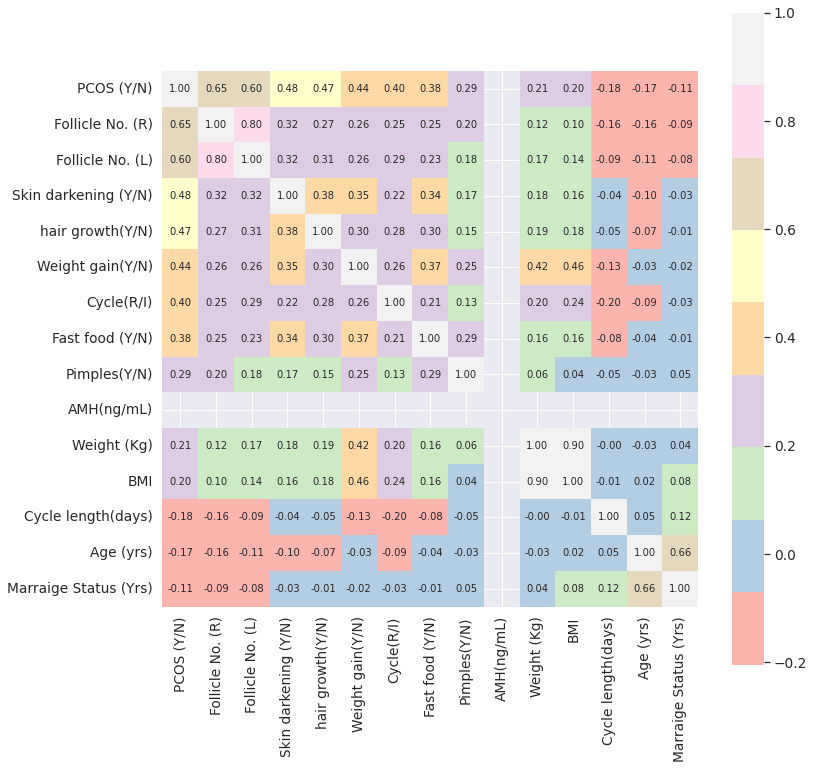

In [ ]:
import numpy as np

#Having a look at features bearing significant correlation

plt.figure(figsize=(12,12))
k = 12 #number of variables with positive for heatmap
l = 3 #number of variables with negative for heatmap
cols_p = corrmat.nlargest(k, "PCOS (Y/N)")["PCOS (Y/N)"].index 
cols_n = corrmat.nsmallest(l, "PCOS (Y/N)")["PCOS (Y/N)"].index
cols = cols_p.append(cols_n)

cm = np.corrcoef(data[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True,cmap="Pastel1", annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

Since the ranges of features vary a lot between our features we will need to perform scaling before building the ML model.

Here are some potential datasets that could be added to the PCOS dataset to improve its usefulness and scope:

Diet and lifestyle habits: Information about the patient's diet and exercise habits can provide insight into the potential causes of PCOS and help guide treatment recommendations.

Genomic data: Genomic data can provide insight into the genetic basis of PCOS and help identify potential risk factors and treatment targets.

No change in problem definition is needed.

**Check extreme values:**

Vit D3 : 2 extreme values that are > 5000 ng/ml. Drop these two samples.

PRG: 1 extreme value that is > 80 ng/ml. Drop this sample.

FSH: 1 extreme value is > 5000 mIU/ml. Drop this sample.

LH: 1 extreme value is > 2000 mIU/ml. Drop this sample.

FSH/LH: 2 exteme value, above 200. Drop these two samples.

AMH: 1 extreme value that is > 60 ng/ml. Drop this sample.

PRL: 2 extreme values that are > 100 ng/ml. Drop these two samples.

Cycle(R/I): 1 extreme value, value of 5. Maybe a typo? Drop this sample.

Pulse rate: 2 extreme value are < 20 bpm. Drop these two samples.

TSH: 1 extreme value is > 50 mIU/L. Drop this sample.
 
RBS: 2 extreme value are >200 mg/dl. Drop these two samples.

BP_Systolic: 1 extreme value, value=12. Drop this sample.

BP_Diastolic: 1 extreme value, value=8. Drop this sample.

In [ ]:
percentage = 18 / 539
print(percentage)

0.03339517625231911


Assume all the extreme values belong to different rows, the maximum percentage of extreme values for the dataset is less than 5% of the total sample size. We decided to drop all the extreme values.

In [ ]:
# Drop the missing values ??
data.dropna(inplace = True)
data.isnull().values.any()

False

In [ ]:
# Let's check whether our data is balanced enough 
data['PCOS (Y/N)'].value_counts()

0    362
1    175
Name: PCOS (Y/N), dtype: int64

Our dataset is rather significant imbalance between two groups. To get the best results, we need to make sure that there are almost 50% instances of both 0.0 and 1.0. In this case, we will perform random Oversampling.

In [ ]:
X = data.drop(["PCOS (Y/N)"],axis = 1) # droping out target from features
y = data["PCOS (Y/N)"]

!pip install imbalanced-learn
from imblearn.over_sampling import RandomOverSampler 
oversample = RandomOverSampler(sampling_strategy=0.9)
X, y = oversample.fit_resample(X, y)
y.value_counts()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


0    362
1    325
Name: PCOS (Y/N), dtype: int64

In [ ]:
#Splitting the data into test and training sets

X_train,X_test, y_train, y_test = train_test_split(X,y, test_size=0.3) 

# MinMax Scaling
from sklearn.preprocessing import MinMaxScaler

minmax_scaler = MinMaxScaler()
X_train_minmax = minmax_scaler.fit_transform(X_train)
X_test_minmax = minmax_scaler.fit_transform(X_test)

In [ ]:
# DT Classifier
from sklearn import tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Create Decision Tree classifer object
#clf = tree.DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, random_state=0)
clf = tree.DecisionTreeClassifier(criterion='gini', random_state=0)

# Train Decision Tree Classifer
clf = clf.fit(X_train_minmax,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test_minmax)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print results in a table
print("Evaluation Metrics:\n")
print("| Metric     | Score       |")
print("|------------|-------------|")
print("| Accuracy   | {:.4f}      |".format(accuracy))
print("| Precision  | {:.4f}      |".format(precision))
print("| Recall     | {:.4f}      |".format(recall))
print("| F1 Score   | {:.4f}      |".format(f1))


Evaluation Metrics:

| Metric     | Score       |
|------------|-------------|
| Accuracy   | 0.8261      |
| Precision  | 0.8409      |
| Recall     | 0.7708      |
| F1 Score   | 0.8043      |


In [ ]:
# Create Decision Tree classifer object
clf = tree.DecisionTreeClassifier(criterion='entropy', random_state=0)

# Train Decision Tree Classifer
clf = clf.fit(X_train_minmax,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test_minmax)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print results in a table
print("Evaluation Metrics:\n")
print("| Metric     | Score       |")
print("|------------|-------------|")
print("| Accuracy   | {:.4f}      |".format(accuracy))
print("| Precision  | {:.4f}      |".format(precision))
print("| Recall     | {:.4f}      |".format(recall))
print("| F1 Score   | {:.4f}      |".format(f1))

Evaluation Metrics:

| Metric     | Score       |
|------------|-------------|
| Accuracy   | 0.8357      |
| Precision  | 0.8100      |
| Recall     | 0.8438      |
| F1 Score   | 0.8265      |


In [ ]:
# Create Decision Tree classifer object
clf = tree.DecisionTreeClassifier(splitter='best', random_state=0)

# Train Decision Tree Classifer
clf = clf.fit(X_train_minmax,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test_minmax)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print results in a table
print("Evaluation Metrics:\n")
print("| Metric     | Score       |")
print("|------------|-------------|")
print("| Accuracy   | {:.4f}      |".format(accuracy))
print("| Precision  | {:.4f}      |".format(precision))
print("| Recall     | {:.4f}      |".format(recall))
print("| F1 Score   | {:.4f}      |".format(f1))

Evaluation Metrics:

| Metric     | Score       |
|------------|-------------|
| Accuracy   | 0.8261      |
| Precision  | 0.8409      |
| Recall     | 0.7708      |
| F1 Score   | 0.8043      |


In [ ]:
# Create Decision Tree classifer object
clf = tree.DecisionTreeClassifier(splitter='random', random_state=0)

# Train Decision Tree Classifer
clf = clf.fit(X_train_minmax,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test_minmax)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print results in a table
print("Evaluation Metrics:\n")
print("| Metric     | Score       |")
print("|------------|-------------|")
print("| Accuracy   | {:.4f}      |".format(accuracy))
print("| Precision  | {:.4f}      |".format(precision))
print("| Recall     | {:.4f}      |".format(recall))
print("| F1 Score   | {:.4f}      |".format(f1))

Evaluation Metrics:

| Metric     | Score       |
|------------|-------------|
| Accuracy   | 0.7874      |
| Precision  | 0.8095      |
| Recall     | 0.7083      |
| F1 Score   | 0.7556      |


In [ ]:
# Create Decision Tree classifer object
clf = tree.DecisionTreeClassifier(min_samples_split=2, random_state=0)

# Train Decision Tree Classifer
clf = clf.fit(X_train_minmax,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test_minmax)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print results in a table
print("Evaluation Metrics:\n")
print("| Metric     | Score       |")
print("|------------|-------------|")
print("| Accuracy   | {:.4f}      |".format(accuracy))
print("| Precision  | {:.4f}      |".format(precision))
print("| Recall     | {:.4f}      |".format(recall))
print("| F1 Score   | {:.4f}      |".format(f1))

Evaluation Metrics:

| Metric     | Score       |
|------------|-------------|
| Accuracy   | 0.8261      |
| Precision  | 0.8409      |
| Recall     | 0.7708      |
| F1 Score   | 0.8043      |


In [ ]:
# Create Decision Tree classifer object
clf = tree.DecisionTreeClassifier(min_samples_leaf=1, random_state=0)

# Train Decision Tree Classifer
clf = clf.fit(X_train_minmax,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test_minmax)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print results in a table
print("Evaluation Metrics:\n")
print("| Metric     | Score       |")
print("|------------|-------------|")
print("| Accuracy   | {:.4f}      |".format(accuracy))
print("| Precision  | {:.4f}      |".format(precision))
print("| Recall     | {:.4f}      |".format(recall))
print("| F1 Score   | {:.4f}      |".format(f1))

Evaluation Metrics:

| Metric     | Score       |
|------------|-------------|
| Accuracy   | 0.8261      |
| Precision  | 0.8409      |
| Recall     | 0.7708      |
| F1 Score   | 0.8043      |


In [ ]:
# Create Decision Tree classifer object
clf = tree.DecisionTreeClassifier(min_samples_leaf=2, random_state=0)

# Train Decision Tree Classifer
clf = clf.fit(X_train_minmax,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test_minmax)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print results in a table
print("Evaluation Metrics:\n")
print("| Metric     | Score       |")
print("|------------|-------------|")
print("| Accuracy   | {:.4f}      |".format(accuracy))
print("| Precision  | {:.4f}      |".format(precision))
print("| Recall     | {:.4f}      |".format(recall))
print("| F1 Score   | {:.4f}      |".format(f1))

Evaluation Metrics:

| Metric     | Score       |
|------------|-------------|
| Accuracy   | 0.8068      |
| Precision  | 0.9000      |
| Recall     | 0.6562      |
| F1 Score   | 0.7590      |


In [ ]:
# Create Decision Tree classifer object
clf_opt = tree.DecisionTreeClassifier(max_depth=4, random_state=0)

# Train Decision Tree Classifer
clf_opt = clf_opt.fit(X_train_minmax,y_train)

#Predict the response for test dataset
y_pred = clf_opt.predict(X_test_minmax)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print results in a table
print("Evaluation Metrics:\n")
print("| Metric     | Score       |")
print("|------------|-------------|")
print("| Accuracy   | {:.4f}      |".format(accuracy))
print("| Precision  | {:.4f}      |".format(precision))
print("| Recall     | {:.4f}      |".format(recall))
print("| F1 Score   | {:.4f}      |".format(f1))

Evaluation Metrics:

| Metric     | Score       |
|------------|-------------|
| Accuracy   | 0.8696      |
| Precision  | 0.8710      |
| Recall     | 0.8438      |
| F1 Score   | 0.8571      |


In [ ]:
# Create Decision Tree classifer object
clf = tree.DecisionTreeClassifier(max_depth=8, random_state=0)

# Train Decision Tree Classifer
clf = clf.fit(X_train_minmax,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test_minmax)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print results in a table
print("Evaluation Metrics:\n")
print("| Metric     | Score       |")
print("|------------|-------------|")
print("| Accuracy   | {:.4f}      |".format(accuracy))
print("| Precision  | {:.4f}      |".format(precision))
print("| Recall     | {:.4f}      |".format(recall))
print("| F1 Score   | {:.4f}      |".format(f1))

Evaluation Metrics:

| Metric     | Score       |
|------------|-------------|
| Accuracy   | 0.8116      |
| Precision  | 0.8353      |
| Recall     | 0.7396      |
| F1 Score   | 0.7845      |


The best hyperparameter for max_depth was found to be 4 which resulted in an accuracy of 0.87

The first split feature is printed as follows:

In [ ]:
data.columns[clf_opt.tree_.feature[0]]

'Follicle No. (L)'

In [ ]:
# Count number of leaves in tree
num_leaves = clf_opt.get_n_leaves()

print("Number of leaves in decision tree:", num_leaves)

Number of leaves in decision tree: 16


In [ ]:
from sklearn.metrics import confusion_matrix

#Predict the response for test dataset
y_pred = clf_opt.predict(X_test_minmax)

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)

print("Confusion matrix:")
print(cm)

Confusion matrix:
[[99 12]
 [15 81]]


The diagonal elements represent the number of correctly classified samples for each class, and the off-diagonal elements represent the number of misclassified samples.

In [ ]:
from sklearn.metrics import classification_report

report = classification_report(y_test, y_pred)

print("Classification report:")
print(report)

Classification report:
              precision    recall  f1-score   support

           0       0.87      0.89      0.88       111
           1       0.87      0.84      0.86        96

    accuracy                           0.87       207
   macro avg       0.87      0.87      0.87       207
weighted avg       0.87      0.87      0.87       207



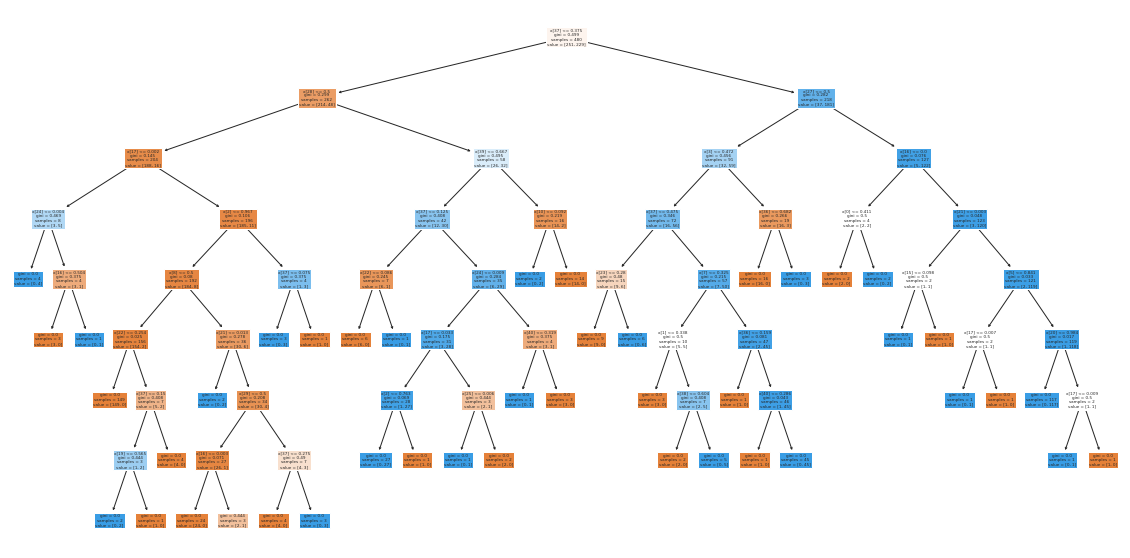

In [ ]:
from sklearn.tree import plot_tree

# Plot decision tree
plt.figure(figsize=(20,10))
plot_tree(clf, filled=True)
plt.show()

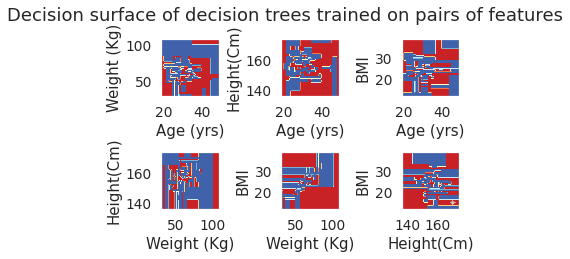

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.inspection import DecisionBoundaryDisplay

# Parameters
n_classes = 2
plot_colors = "ryb"
plot_step = 0.02


for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3], [1, 2], [1, 3], [2, 3]]):
    # We only take the two corresponding features
    X = X_train.iloc[:, pair]
    y = y_train

    # Train
    clf = DecisionTreeClassifier().fit(X, y)

    # Plot the decision boundary
    ax = plt.subplot(2, 3, pairidx + 1)
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)
    DecisionBoundaryDisplay.from_estimator(
        clf,
        X,
        cmap=plt.cm.RdYlBu,
        response_method="predict",
        ax=ax,
        xlabel=X_train.columns[pair[0]],
        ylabel=X_train.columns[pair[1]],
    )

plt.suptitle("Decision surface of decision trees trained on pairs of features")
plt.legend(loc="lower right", borderpad=0, handletextpad=0)
_ = plt.axis("tight")

The motivation of the DT classifier is to be able to predict PCOS disease based on the input features

The healthcare system can use this system to prioritize patients to be referred to a doctor.

This model should be used by a professional doctor to make sure that the results make sense